In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Little exploratory data analysis. Datatypes, NullValues

In [2]:
df = pd.read_csv('german_credit_data.csv', index_col=0)

original_df = df.copy()

df = df.rename(columns={'Credit amount':'Credit_amount'})

df.info()
df.describe()
df.columns
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit_amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Checking account    394
Saving accounts     183
Risk                  0
Purpose               0
Duration              0
Credit_amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

## Gender Analysis

In [3]:
df['Sex'].value_counts()

by_age = df['Age'].values.tolist()
male_age = df['Age'].loc[df['Sex'] == 'male'].values.tolist()
female_age = df['Age'].loc[df['Sex'] == 'female'].values.tolist()

Text(0.5,0,'All Gender')

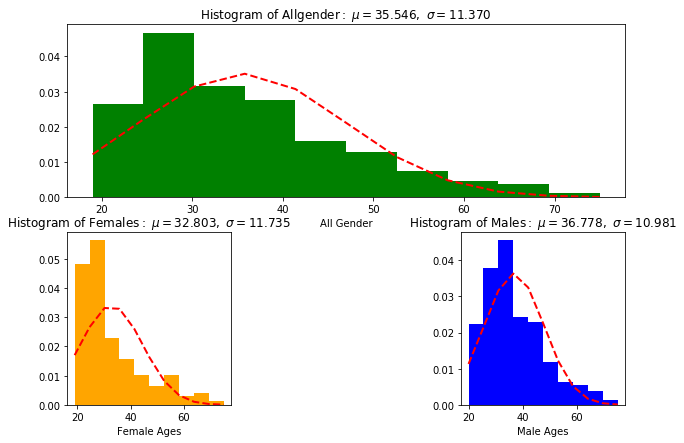

In [4]:
import matplotlib.mlab as mlab
from scipy.stats import norm

fig = plt.figure(figsize=(10, 7))

####Male
sub1 = fig.add_subplot(236)
(mu, sigma) = norm.fit(male_age)

n, bins, patches = plt.hist(male_age, normed=1, facecolor='blue',alpha = 1)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

legend = ['Distribution of Genders']
#sub1.plt.xlabel('Male_Age')
sub1.set_title(r'$\mathrm{Histogram\ of\ Males:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
sub1.set_xlabel('Male Ages')
#sub1.plt.grid(True)
#sub1.plt.show()

###Female
sub2 = fig.add_subplot(234)
(mu2, sigma2) = norm.fit(female_age)

n, bins, patches = plt.hist(female_age, normed=1, facecolor='orange',alpha = 1)
y = mlab.normpdf( bins, mu2, sigma2)
l = plt.plot(bins, y, 'r--', linewidth=2)
sub2.set_title(r'$\mathrm{Histogram\ of\ Females:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu2, sigma2))
sub2.set_xlabel('Female Ages')

#####All gender
sub3 = fig.add_subplot(211)
(mu3, sigma3) = norm.fit(by_age)

n, bins, patches = plt.hist(by_age, normed=1, facecolor='green',alpha = 1)
y = mlab.normpdf( bins, mu3, sigma3)
l = plt.plot(bins, y, 'r--', linewidth=2)
sub3.set_title(r'$\mathrm{Histogram\ of\ All gender:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu3, sigma3))
sub3.set_xlabel('All Gender')

## Gender vs Purpose

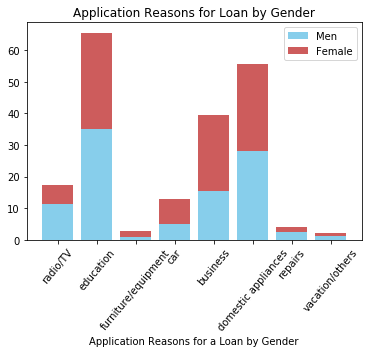

In [7]:
######## Gender vs Purpose 

df['Purpose'].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

purpose = df['Purpose'].unique().tolist()
#purpose = ['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       #'domestic appliances', 'repairs', 'vacation/others']
#np.asarray(purpose)
m_purpose = sex_purpose['male']
f_purpose = sex_purpose['female']

###Plot

ind = np.arange(len(purpose))
fig2, ax2 = plt.subplots()

p1 = ax2.bar(ind,m_purpose, color='SkyBlue', label='Men')
p1 = ax2.bar(ind,f_purpose, color='IndianRed', label='Female',bottom=m_purpose)
ax2.set_title('Application Reasons for Loan by Gender')
plt.xticks(ind,purpose,rotation=50, fontsize=10)
plt.xlabel('Application Reasons for a Loan by Gender')
plt.legend()

## Number of Jobs by Gender

Text(0.5,1,'Number of Jobs taken by Gender: Female')

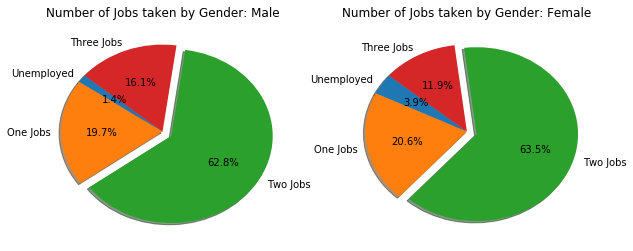

In [8]:
################ Number of Jobs

number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

job_number_m = number_of_jobs["male"].values.tolist()
job_number_f = number_of_jobs["female"].values.tolist()

###Pie Chart
fig3, ax3 =plt.subplots(1,2,figsize=(10,4))
labels_job=['Unemployed','One Jobs','Two Jobs','Three Jobs']
explode = (0, 0, 0.1, 0) 
ax3[0].pie(job_number_m,labels=labels_job,explode = explode,autopct='%1.1f%%', shadow=True, startangle=140)
ax3[0].set_title('Number of Jobs taken by Gender: Male')

#fig4, ax4 = plt.subplots()
ax3[1].pie(job_number_f,labels=labels_job,explode = explode,autopct='%1.1f%%', shadow=True, startangle=140)
ax3[1].set_title('Number of Jobs taken by Gender: Female')

## Boxplot Credit Amount by Age Groups

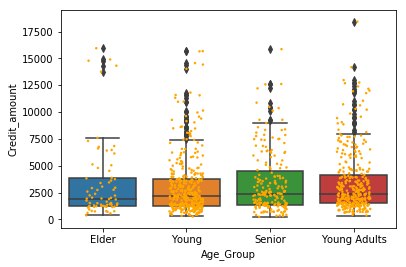

In [9]:
########## Age_Group
df['Age_Group'] = np.nan
df.loc[(df['Age'] > 18) & (df['Age'] <= 29), 'Age_Group'] = 'Young'
df.loc[(df['Age'] > 29) & (df['Age'] <= 40), 'Age_Group'] = 'Young Adults'
df.loc[(df['Age'] > 40) & (df['Age'] <= 55), 'Age_Group'] = 'Senior'
df.loc[df['Age'] > 55, 'Age_Group'] = 'Elder'


# Credit Amount in die Liste 
young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()
####Violin Chart 
import seaborn as sns

fig5, ax5 =plt.subplots()

#sns.swarmplot( y = 'Credit_amount',x='Age_Group',hue="Age_Group",
              #palette=["r", "c", "y",'b'], data=df)

sns.boxplot(y = 'Credit_amount',x='Age_Group', data=df)
sns.stripplot(y = 'Credit_amount',x='Age_Group', data=df, color="orange", jitter=0.2, size=2.5)  

## Good vs. Bad Credit

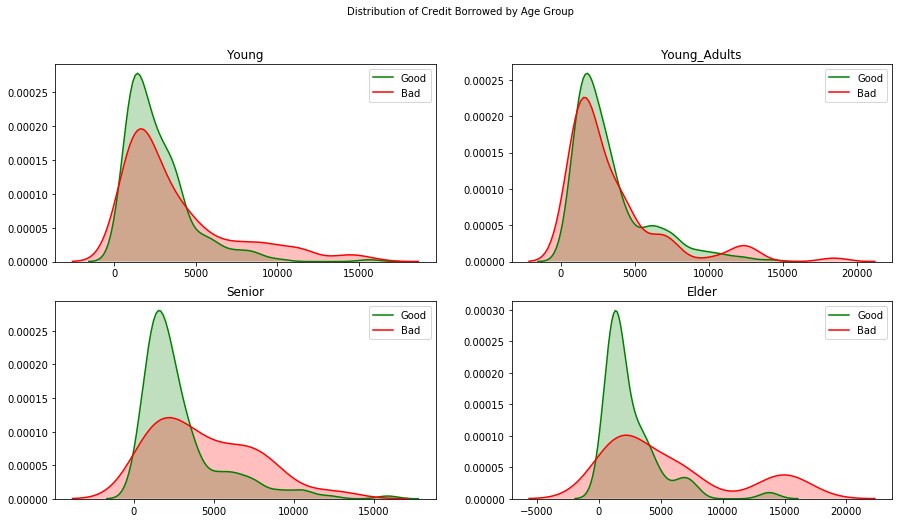

In [12]:
############ Good vs. Bad Credit 
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]
#good_credit_df.groupby(['Age_Group']).get_group('Young')
young2 = df[['Credit_amount','Risk']].loc[df['Age_Group'] == 'Young']
young_adults2= df[['Credit_amount','Risk']].loc[df['Age_Group'] == 'Young Adults']
senior2 = df[['Credit_amount','Risk']].loc[df['Age_Group'] == 'Senior']
elder_credit2 = df[['Credit_amount','Risk']].loc[df['Age_Group'] == 'Elder']




fig6, ax6 =plt.subplots(2,2, figsize=(15,8))
fig6.suptitle('Distribution of Credit Borrowed by Age Group', fontsize=10)

#sns.kdeplot(good_credit_df , shade=True, color="r")
sns.kdeplot(young2['Credit_amount'].loc[young2['Risk'] == 'good'], shade=True, color="g", ax =ax6[0][0])
sns.kdeplot(young2['Credit_amount'].loc[young2['Risk'] == 'bad'], shade=True, color="r",ax =ax6[0][0])
ax6[0][0].title.set_text('Young')
ax6[0][0].legend(['Good','Bad'])
sns.kdeplot(young_adults2['Credit_amount'].loc[young_adults2['Risk'] == 'good'], shade=True, color="g",ax =ax6[0][1])    
sns.kdeplot(young_adults2['Credit_amount'].loc[young_adults2['Risk'] == 'bad'], shade=True, color="r",ax =ax6[0][1])   
ax6[0][1].title.set_text('Young_Adults')
ax6[0][1].legend(['Good','Bad'])
sns.kdeplot(senior2['Credit_amount'].loc[senior2['Risk'] == 'good'], shade=True, color="g",ax =ax6[1][0])
sns.kdeplot(senior2['Credit_amount'].loc[senior2['Risk'] == 'bad'], shade=True, color="r",ax =ax6[1][0]) 
ax6[1][0].title.set_text('Senior')
ax6[1][0].legend(['Good','Bad'])
sns.kdeplot(elder_credit2['Credit_amount'].loc[elder_credit2['Risk'] == 'good'], shade=True, color="g",ax =ax6[1][1])   
sns.kdeplot(elder_credit2['Credit_amount'].loc[elder_credit2['Risk'] == 'bad'], shade=True, color="r",ax =ax6[1][1])  
ax6[1][1].title.set_text('Elder')
ax6[1][1].legend(['Good','Bad'])      


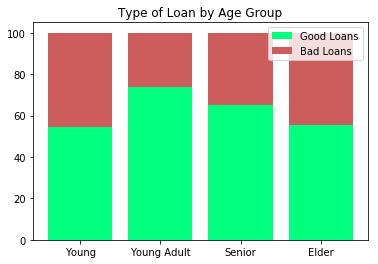

In [13]:
################ Typ of Loans by age group #############

young_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'good')].sum()
young_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'bad')].sum()
young_adult_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'good')].sum()
young_adult_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'bad')].sum()
senior_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'good')].sum()
senior_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'bad')].sum()
elder_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'good')].sum()
elder_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'bad')].sum()  


###### Percents for Chart
young_good_p = (young_good/(young_good+young_bad))*100       
young_bad_p = (young_bad/(young_good+young_bad))*100 

young_adult_good_p = (young_adult_good/(young_adult_good+young_adult_bad))*100   
young_adult_bad_p = (young_adult_bad/(young_adult_good+young_adult_bad))*100  

senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100

elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100
### Round Percents
#young_good_p = str(round(young_good_p, 2))
#young_bad_p = str(round(young_bad_p, 2))
#young_adult_good_p = str(round(young_adult_good_p, 2))
#young_adult_bad_p = str(round(young_adult_bad_p, 2))
#senior_good_p = str(round(senior_good_p, 2))
#senior_bad_p = str(round(senior_bad_p, 2))
#elder_good_p = str(round(elder_good_p, 2))
#elder_bad_p = str(round(elder_bad_p, 2))


fig7, ax7 = plt.subplots()

objects = ('Young','Young Adult','Senior','Elder')
y_pos = np.arange(len(objects))
good_p = [young_good_p,young_adult_good_p,senior_good_p,elder_good_p]
bad_p = [young_bad_p,young_adult_bad_p,senior_bad_p,elder_bad_p]
p3 = ax7.bar(y_pos, good_p, color='springgreen', label = 'Good Loans')
p4 = ax7.bar(y_pos, bad_p,color='indianred' ,bottom = good_p, label= 'Bad Loans')
ax7.set_title('Type of Loan by Age Group')
plt.xticks(y_pos,objects)
plt.legend()


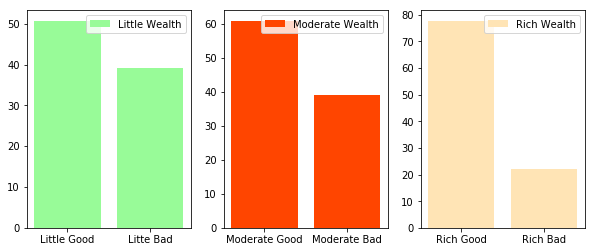

In [14]:
######## Wealth Analysis########
cross_checking = pd.crosstab(df['Risk'], df['Checking account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

fig8, ax8 = plt.subplots(1,3,figsize=(10,4))

lists_little = ('Little Good','Litte Bad')
lists_little_pos = np.arange(len(lists_little))
little_pos = [good_little,bad_moderate]
o1 = ax8[0].bar(lists_little_pos, little_pos, color='palegreen', label = 'Little Wealth')
ax8[0].set_xticks(range(2))
ax8[0].set_xticklabels(lists_little)
ax8[0].legend()
lists_moderate = ('Moderate Good','Moderate Bad')
lists_moderate_pos = np.arange(len(lists_moderate))
moderate_pos = [good_moderate,bad_moderate]
o2 = ax8[1].bar(lists_moderate_pos,moderate_pos, color='orangered', label = 'Moderate Wealth')
ax8[1].set_xticks(range(2))
ax8[1].set_xticklabels(lists_moderate)
ax8[1].legend()

lists_rich = ('Rich Good','Rich Bad')
lists_rich_pos = np.arange(len(lists_rich))
rich_pos = [good_rich,bad_rich]
o2 = ax8[2].bar(lists_rich_pos,rich_pos, color='moccasin', label = 'Rich Wealth')
ax8[2].set_xticks(range(2))
ax8[2].set_xticklabels(lists_rich)
ax8[2].legend()

In [15]:
####################################

######## High Risk Loans vs. Low Risk Loans:
